$\textbf{PROGRAMMING ASSIGNMENT - LECTURE 1}$
---

Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

## Dataset: Haberman's Survival

In [177]:
# imports
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Access Dataset

In [178]:
df = pd.read_csv('Datasets/haberman.data', header=None)
df.columns = ['age', 'operation_year', 'positive_axillary_nodes', 'survival_status']
df.head()

,age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


---

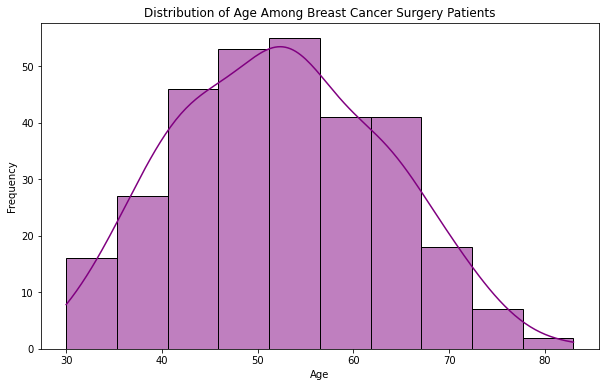

In [179]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True, color='purple')
plt.title('Distribution of Age Among Breast Cancer Surgery Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

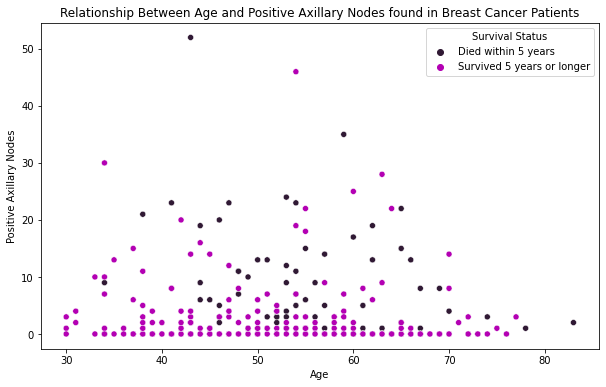

In [180]:
df['survival_status'] = df['survival_status'].map({1: 'Survived 5 years or longer', 2: 'Died within 5 years'})
df['survival_status'] = df['survival_status'].astype('category')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='positive_axillary_nodes', hue='survival_status', palette=['#301934', '#b300b3'], data=df)
plt.title('Relationship Between Age and Positive Axillary Nodes found in Breast Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Positive Axillary Nodes')
plt.legend(title='Survival Status')
plt.show()

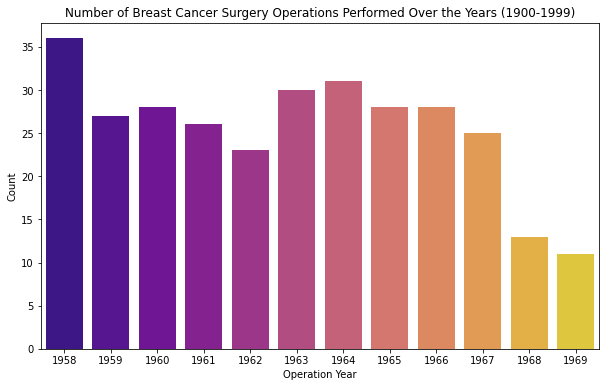

In [181]:
df['operation_year'] = df['operation_year'] + 1900

# Plot: Number of Operations Over Time with Plasma Color Scheme
plt.figure(figsize=(10, 6))
sns.countplot(x='operation_year', data=df, palette='plasma')
plt.title('Number of Breast Cancer Surgery Operations Performed Over the Years (1900-1999)')
plt.xlabel('Operation Year')
plt.ylabel('Count')
plt.show()

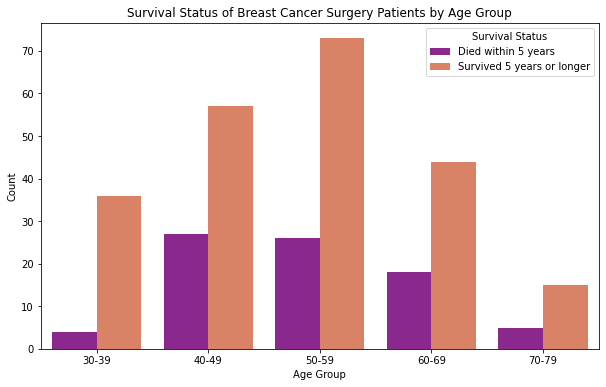

In [182]:
age_bins = [30, 40, 50, 60, 70, 80]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survival_status', data=df, palette='plasma')
plt.title('Survival Status of Breast Cancer Surgery Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.show()

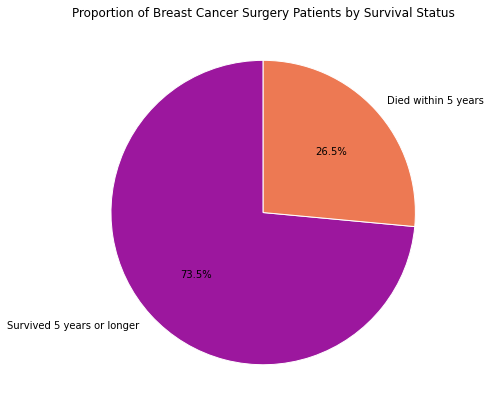

In [199]:
plasma_colors = sns.color_palette('plasma', 2)

plt.figure(figsize=(7, 7), facecolor='white')
df['survival_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plasma_colors, wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Breast Cancer Surgery Patients by Survival Status')
plt.ylabel('')
plt.show()

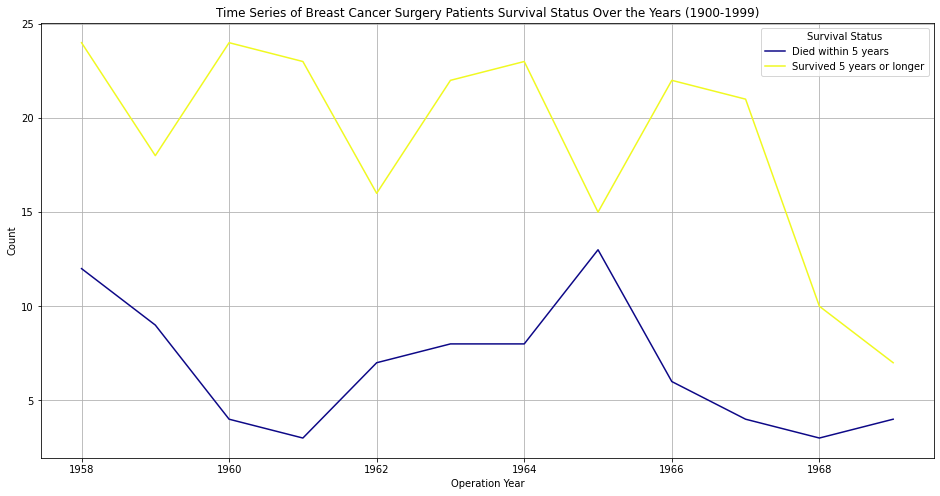

In [194]:
time_series_data = df.groupby(['operation_year', 'survival_status']).size().unstack(fill_value=0)

time_series_data.plot(kind='line', colormap='plasma', figsize=(16, 8))
plt.title('Time Series of Breast Cancer Surgery Patients Survival Status Over the Years (1900-1999)')
plt.xlabel('Operation Year')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.grid(True)
plt.show()